#### Jared Rozowsky
#### BME 6938 - Homework 3

In [1]:
import pandas as pd

# read CSV file from local path
# each column represenets expression levels of a gene
# each row is a sample

df = pd.read_csv('HW3Data.csv', header = None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,0,2.080754,1.099069,0.927763,1.029081,-0.130763,1.265460,-0.436286,0.728881,2.107979,...,-0.825403,-0.138451,0.382957,0.876697,-0.216234,-1.408300,0.393327,-0.148522,1.591533,-0.217481
1,1,1.109457,0.786453,0.445560,-0.146323,-0.996316,0.555759,0.290734,-0.145259,1.132660,...,-1.056288,-0.205499,-1.815374,0.324373,-1.296909,-0.870757,1.108739,1.094010,-0.492141,-1.554079
2,0,-0.676530,1.693100,1.559247,1.559983,-0.982179,-1.358507,-1.313994,-0.455067,0.295214,...,1.242968,1.230157,-2.038999,2.366093,0.820656,1.404501,0.176860,-0.086285,-0.390878,-0.089465
3,1,0.534396,1.677537,1.489030,0.778605,-0.183776,-1.116850,-1.487557,-0.579511,0.292683,...,0.559852,-0.593149,-4.440577,1.720705,-0.124617,-0.435880,0.228440,-0.893938,1.005879,-0.631247
4,0,-1.018903,0.511080,0.755641,1.013816,0.529899,0.160440,-0.087055,1.295290,0.458736,...,0.227110,0.497628,-0.083921,-0.382733,-0.913389,1.122928,0.834571,-0.283786,-2.860340,0.280871


In [2]:
X = df.loc[:, 1:].values
y = df.loc[:, 0].values

### Holdout method for splitting training and testing data

In [3]:
from sklearn.model_selection import train_test_split

# Hold out 20% of data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = 1)

### Scale data and fit model for feature selection

Optimal number of features : 4


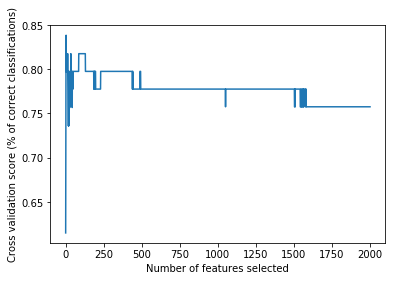

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# fit and transform standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Create the RFE object and compute a cross-validated score
svc = SVC(kernel="linear")

# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy', n_jobs=-1)
rfecv.fit(X_train,y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features vs. cross-validated scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (% of correct classifications)")
plt.plot(range(1,len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [5]:
# Columns (genes) selected with RFECV
print(rfecv.ranking_[0:rfecv.n_features_])

[1152  904  489 1099]


### Scale testing data, fit final model and determine accuracy

In [6]:
# Reduce training data to selected features
X_train = X_train[:,rfecv.support_]

# Re-train model using reduced dataset
svc.fit(X_train,y_train)

# Standardize testing data and reduce to selected features
X_test = scaler.transform(X_test)
X_test = X_test[:,rfecv.support_]

print('Test accuracy: %.3f' % svc.score(X_test,y_test))

Test accuracy: 0.923
